# Decision Tree Regressor

- Decision trees are predictive models that use a set of binary rules to calculate a target value.
- Each individual tree is a fairly simple model that has branches, nodes and leaves.

### Important Terminology

1. **Root Node**: It represents entire population or sample and this further gets divided into two or more homogeneous sets.
2. **Splitting**: It is a process of dividing a node into two or more sub-nodes.
3. **Decision Node**: When a sub-node splits into further sub-nodes, then it is called decision node.
4. **Leaf/Terminal Node**: Nodes do not split is called Leaf or Terminal node.
5. **Pruning**: When we remove sub-nodes of a decision node, this process is called pruning. You can say opposite process of splitting.
6. **Branch / Sub-Tree**: A sub section of entire tree is called branch or sub-tree.
7. **Parent and Child Node**: A node, which is divided into sub-nodes is called parent node of sub-nodes whereas sub-nodes are the child of parent node.

## For regression trees, two common impurity measures are:
### 1. Least squares. 
This method is similar to minimizing least squares in a linear model. Splits are chosen to minimize the residual sum of squares between the observation and the mean in each node.
### 2. Least absolute deviations. 
This method minimizes the mean absolute deviation from the median within a node. The advantage of this over least squares is that it is not as sensitive to outliers and provides a more robust model. The disadvantage is in insensitivity when dealing with data sets containing a large proportion of zeros.

# How Does CART Work in Regression with one predictor?

Like Gini impurity in classification, their is  least squares in Regression, intuitively splits are chosen to minimize the residual sum of squares between the observation and the mean in each node. Mathematically, we can write residual as follow.

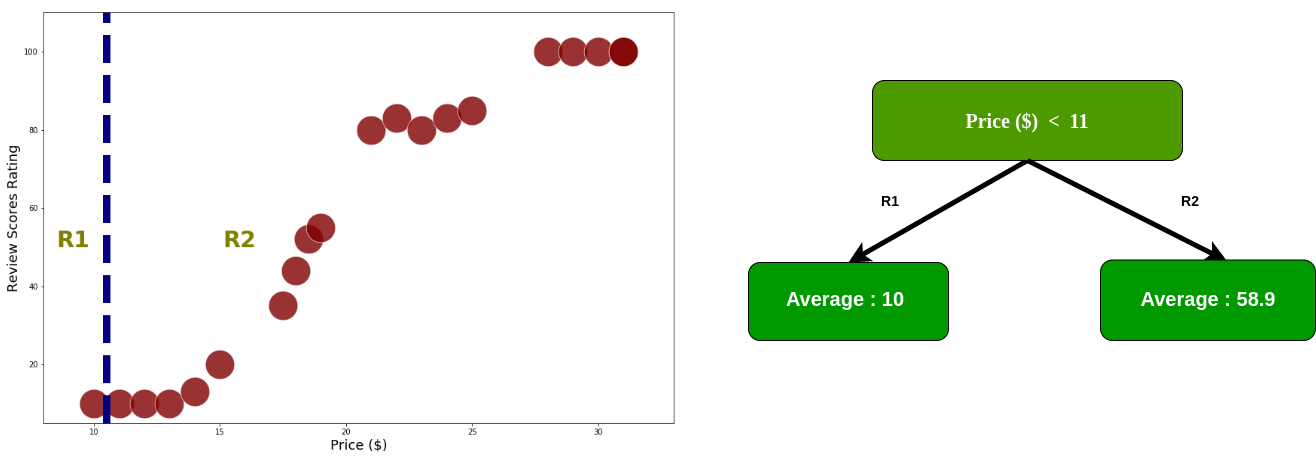

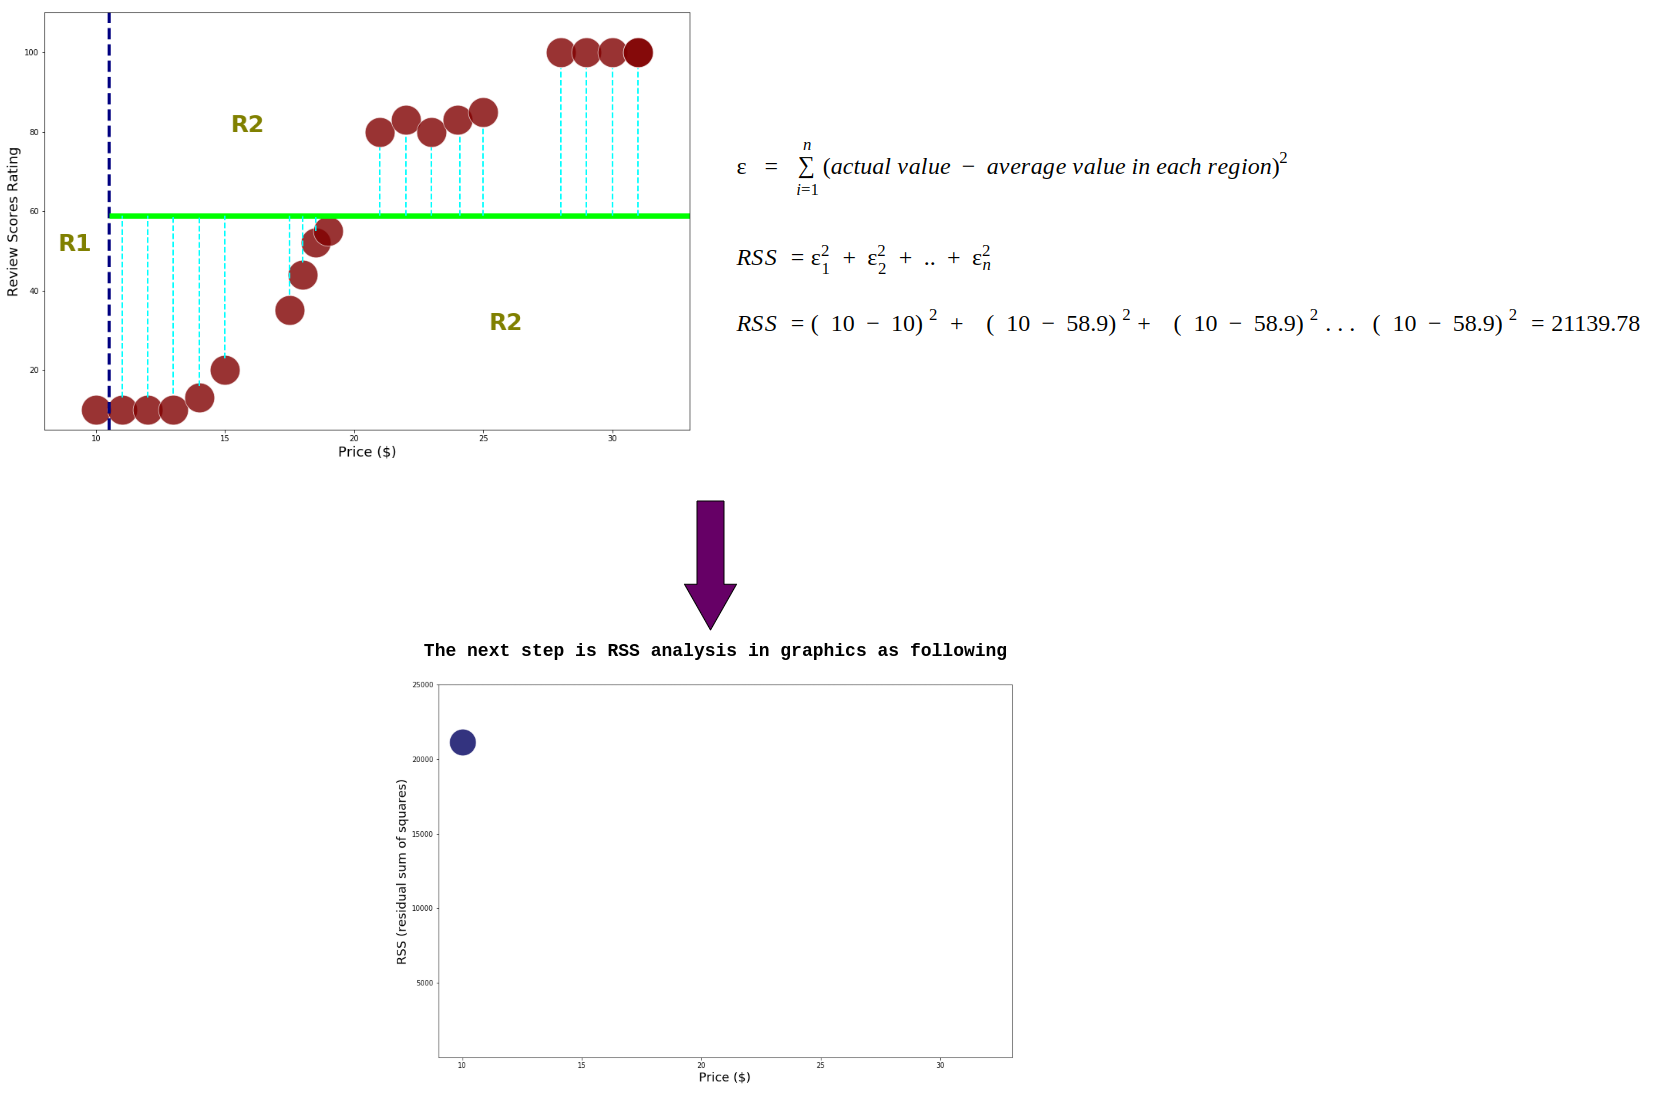

#### In order to find out the “best” split, we must minimize the RSS


# 1. Intuition
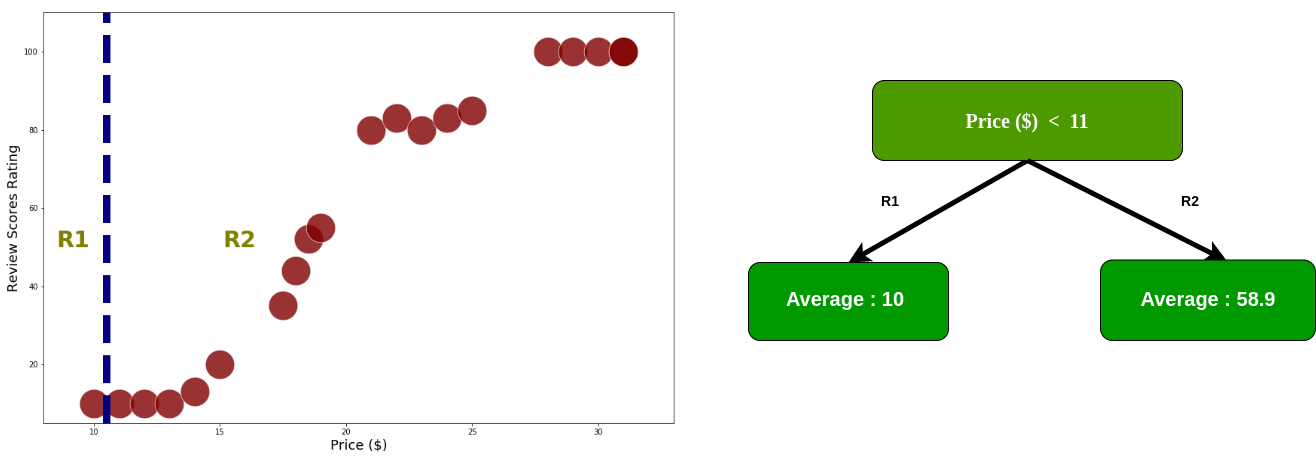

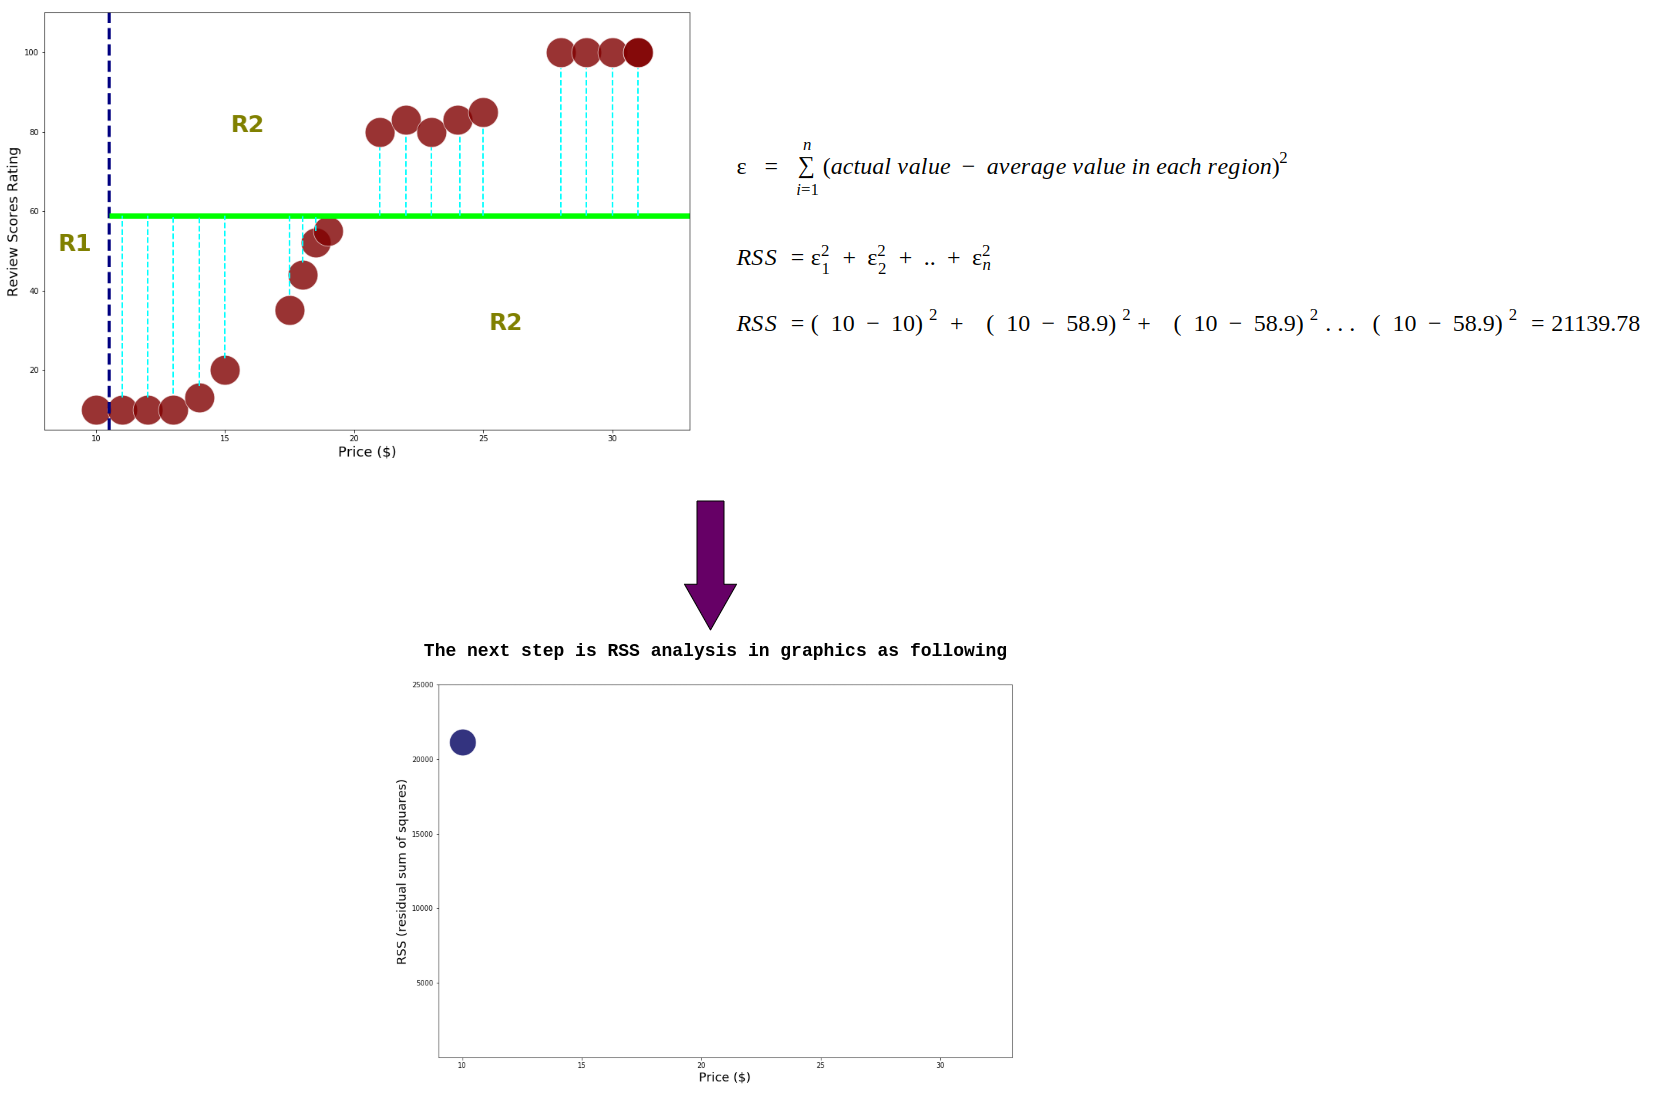

# 2. How does CART process the splitting of the dataset (predictor =1)
As mentioned before, In order to find out the “best” split, we must minimize the RSS. first, we calculate RSS by split into two regions, start with index 0
Start within index 0
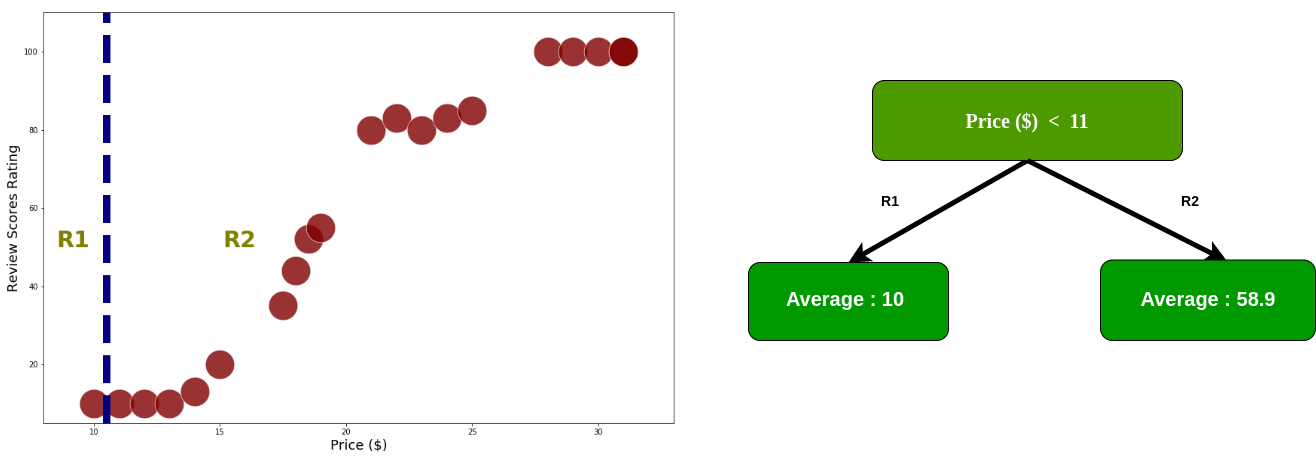
The data already split into two regions, we add up the squared residual for every index data. furthermore we calculate RSS each node using equation 2.0

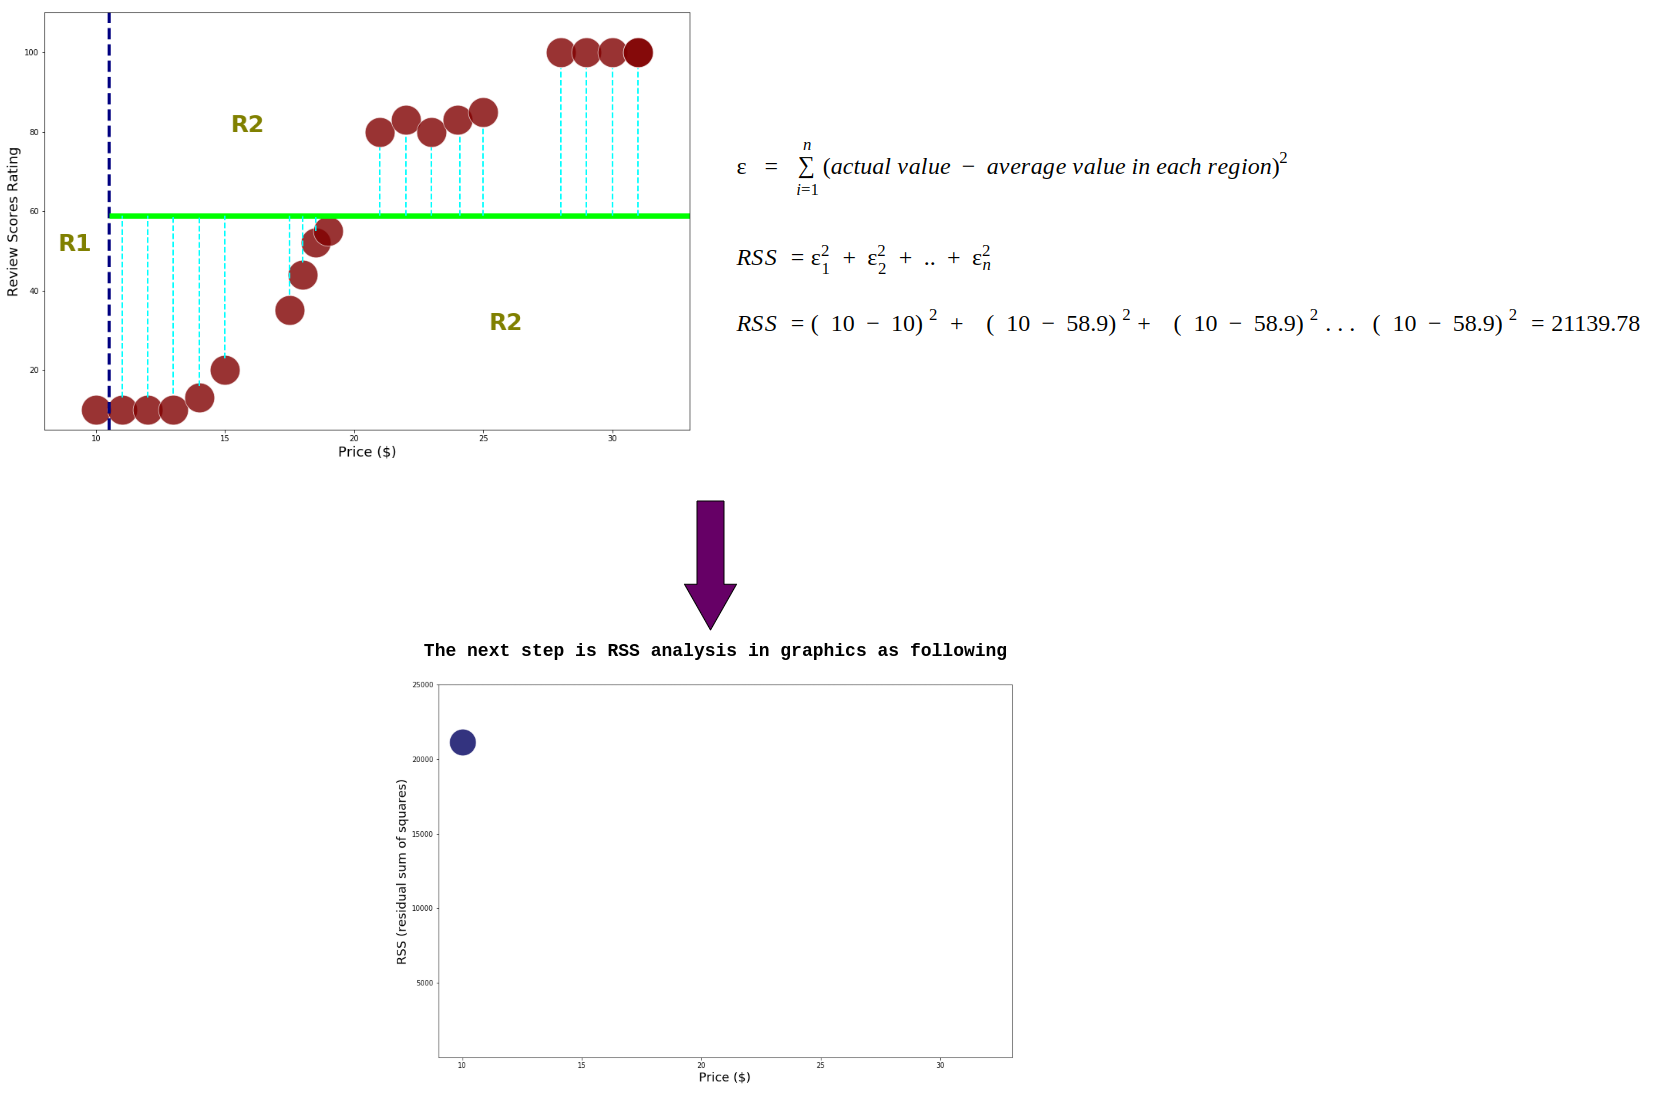

Start within index 1
calculate RSS by split into two regions within index 1
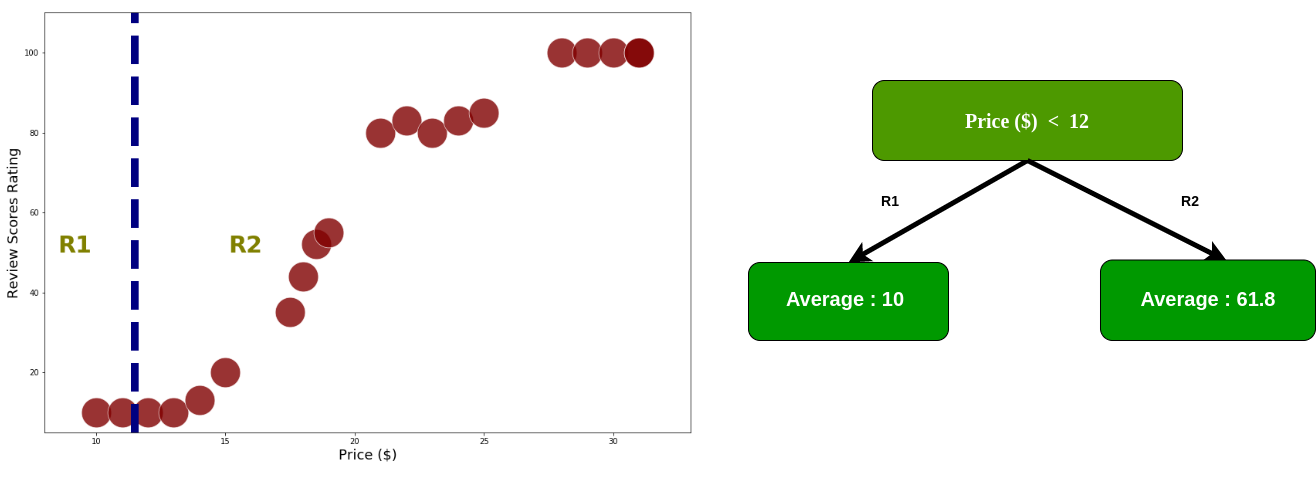

after the data is divided into two regions then calculate RSS each node using equation 2.0

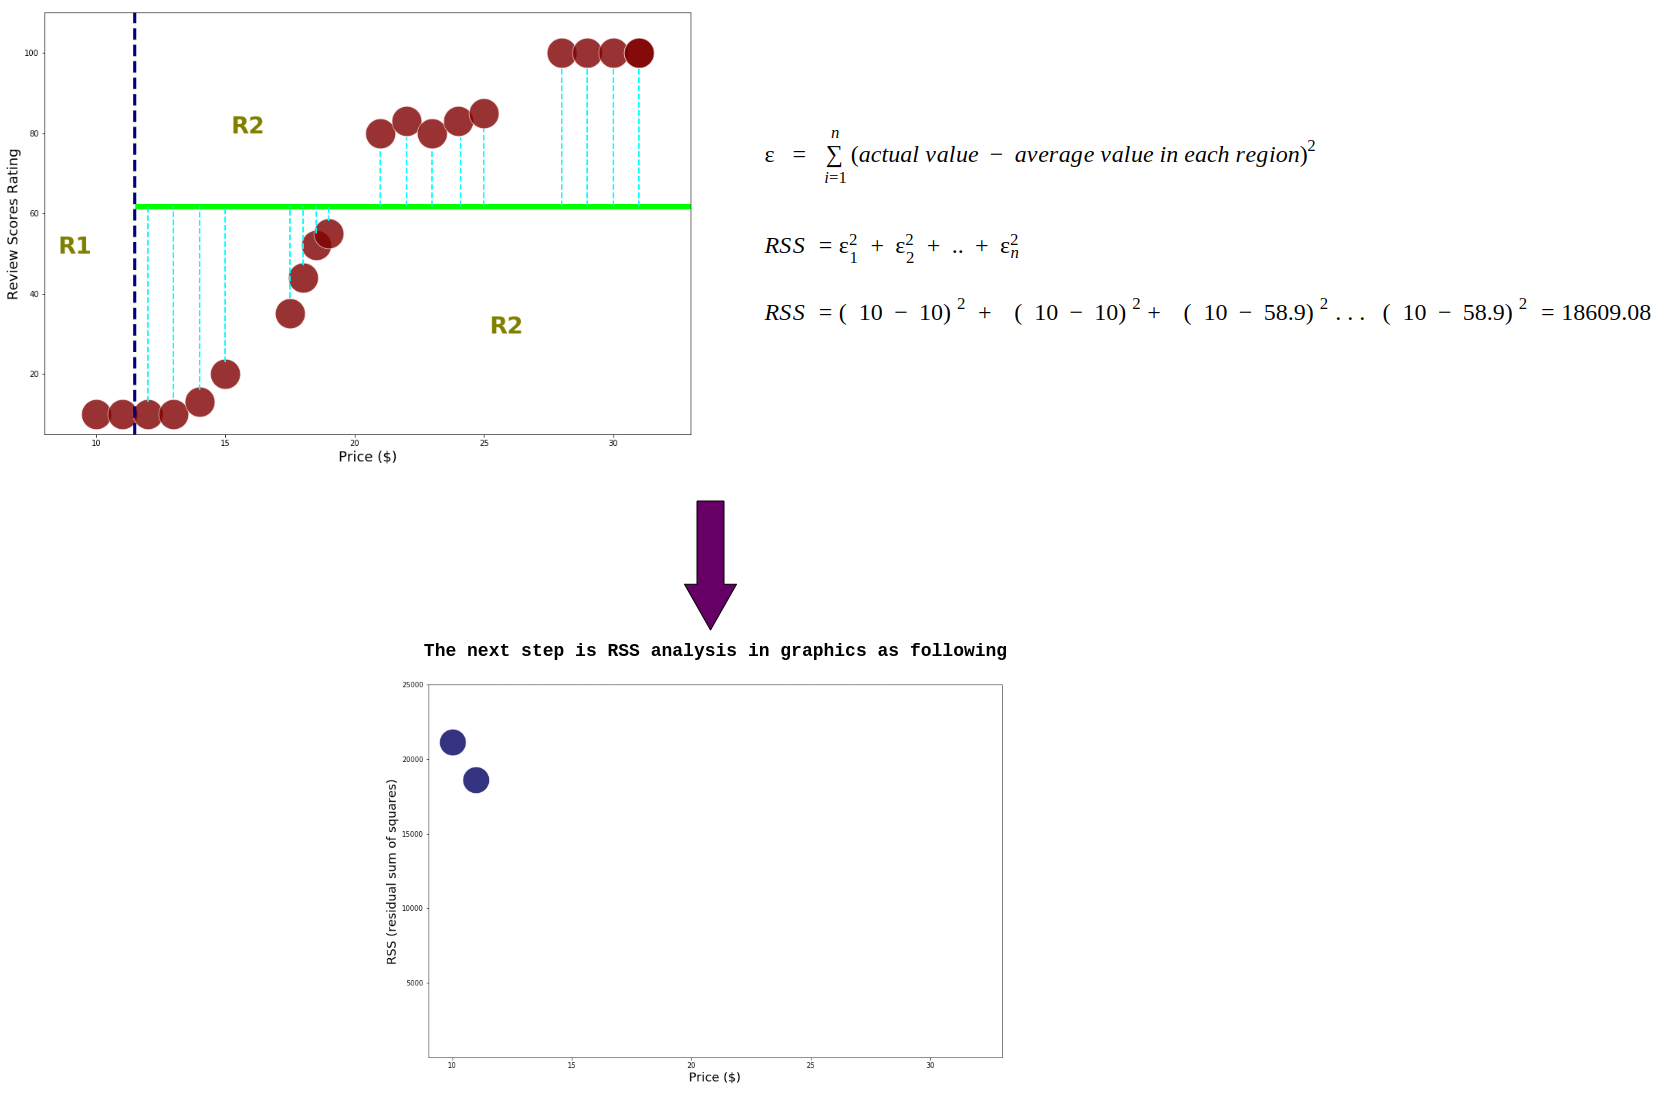

Start within index 2
calculate RSS by split into two regions within index 2

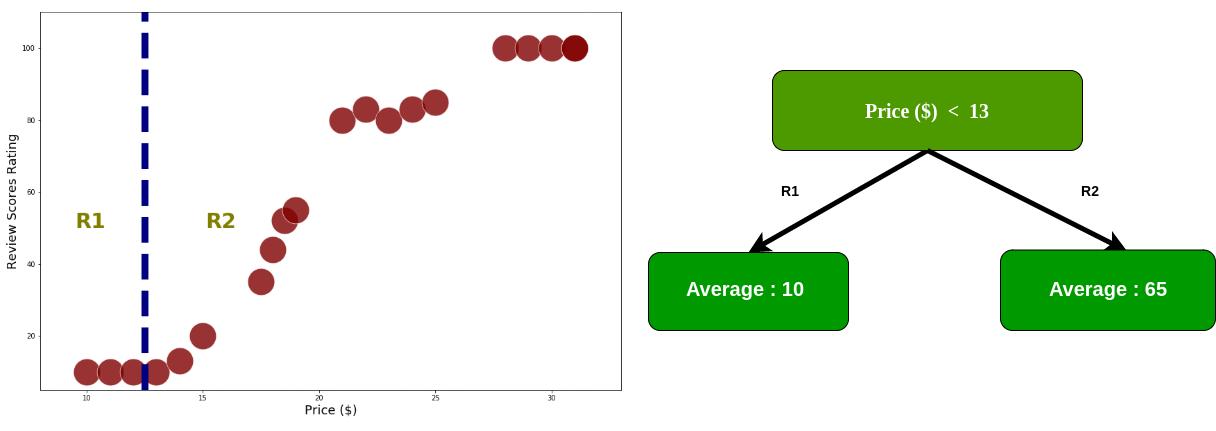

calculate RSS each node

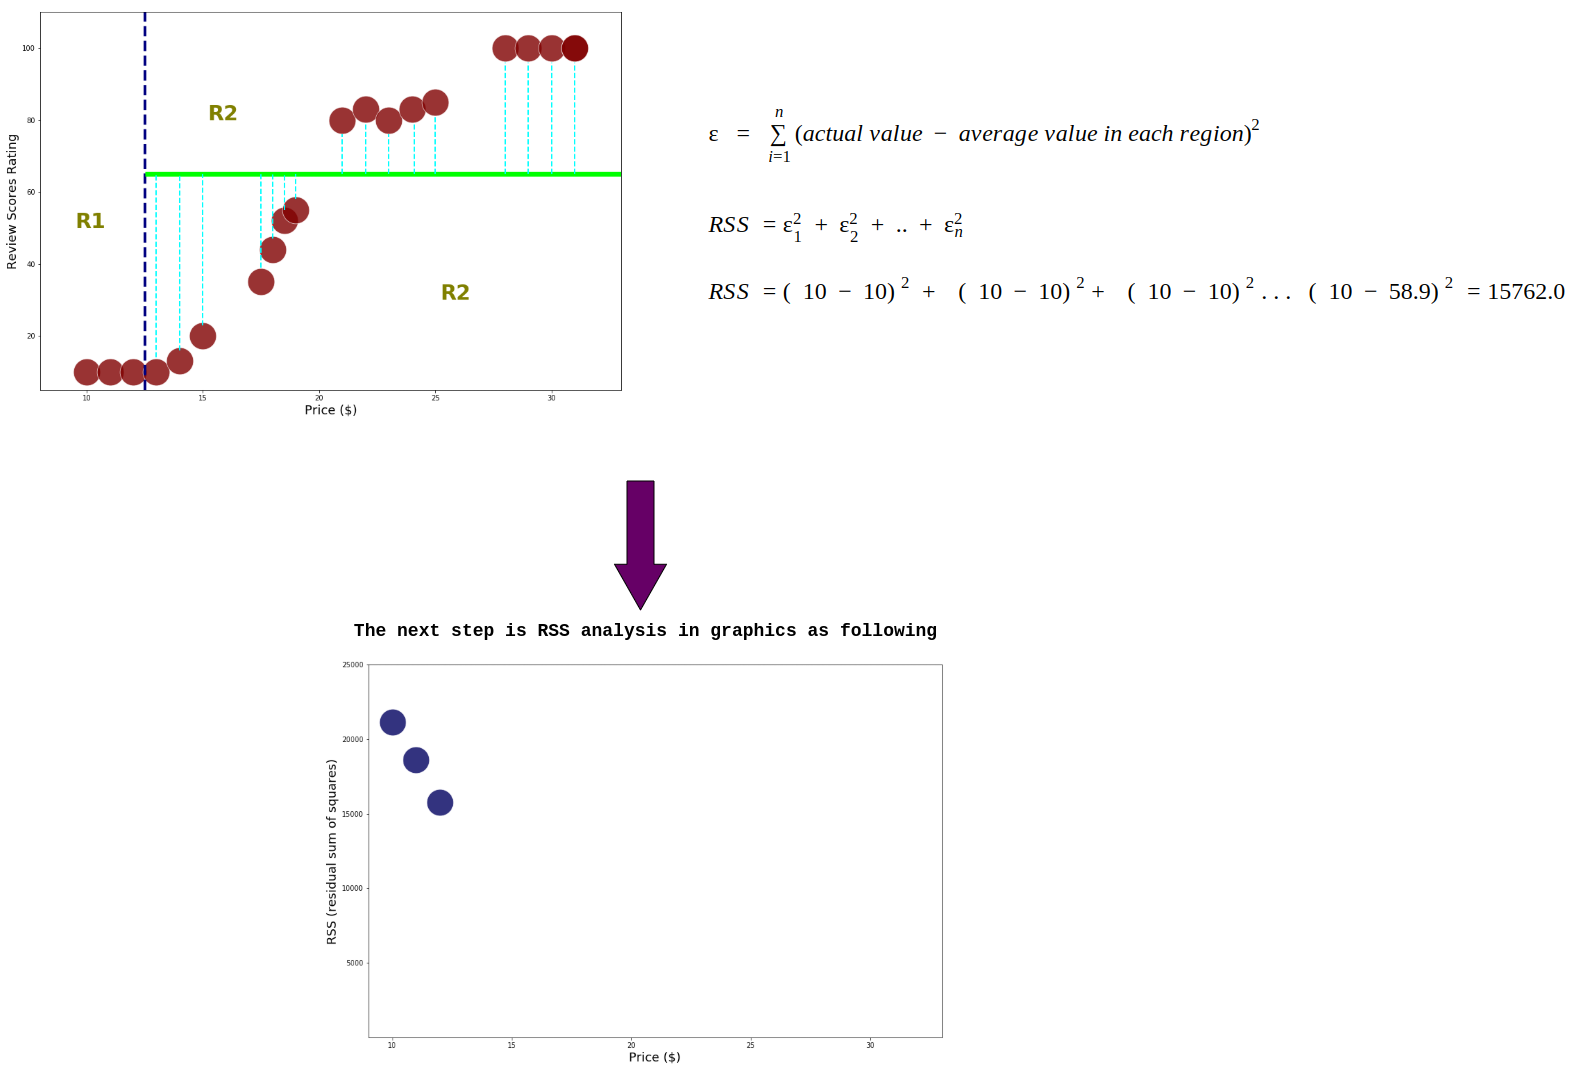

This process continues until the calculation of RSS in the last index
Last Index
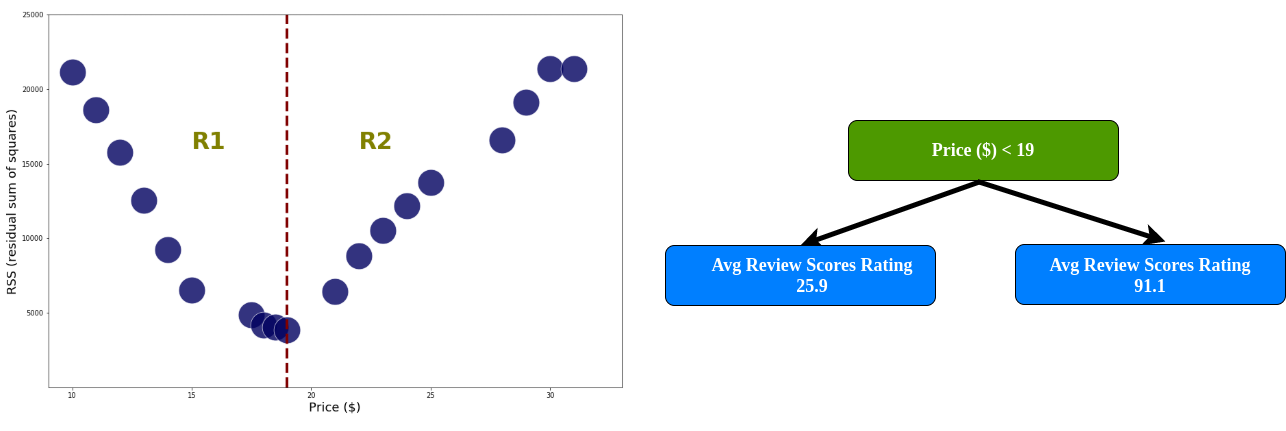
Price with threshold 19 has a smallest RSS, in R1 there are 10 data within price < 19, so we’ll split the data in R1. In order to avoid overfitting, we define the minimum data for each region >= 6. If the region has less than 6 data, the split process in that region stops.

Split the data with threshold 19

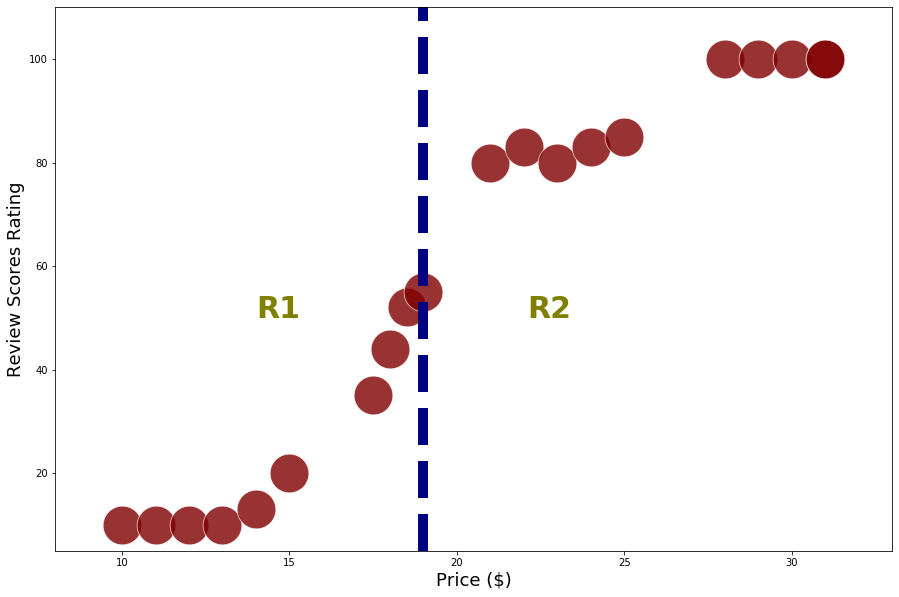

calculate RSS in R1, the process in this section is the same as the previous process, only done for R1

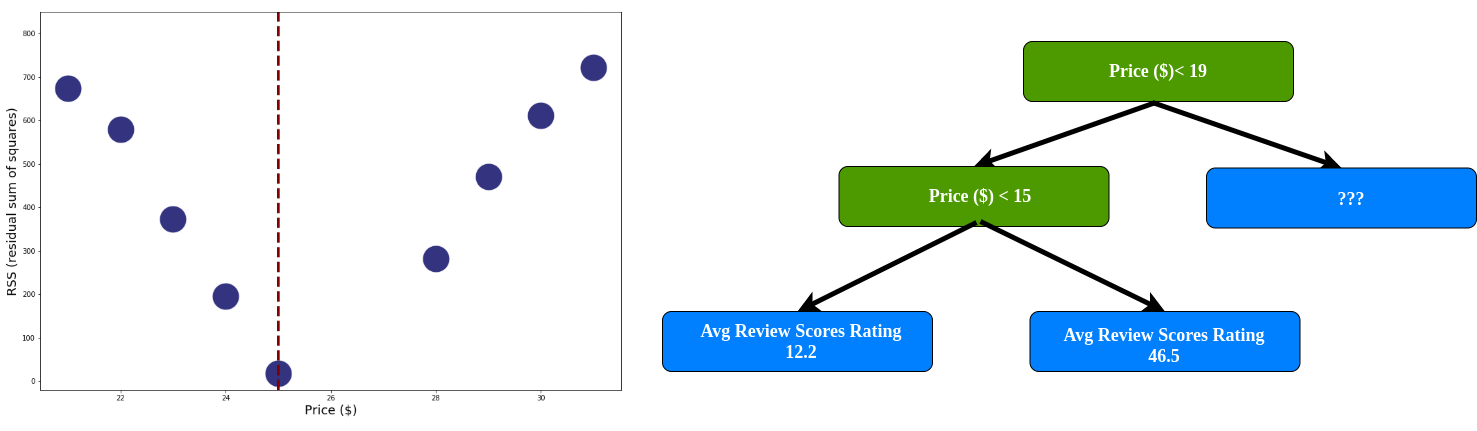

Do the same thing on the right branch, so the end result of a tree in this case is

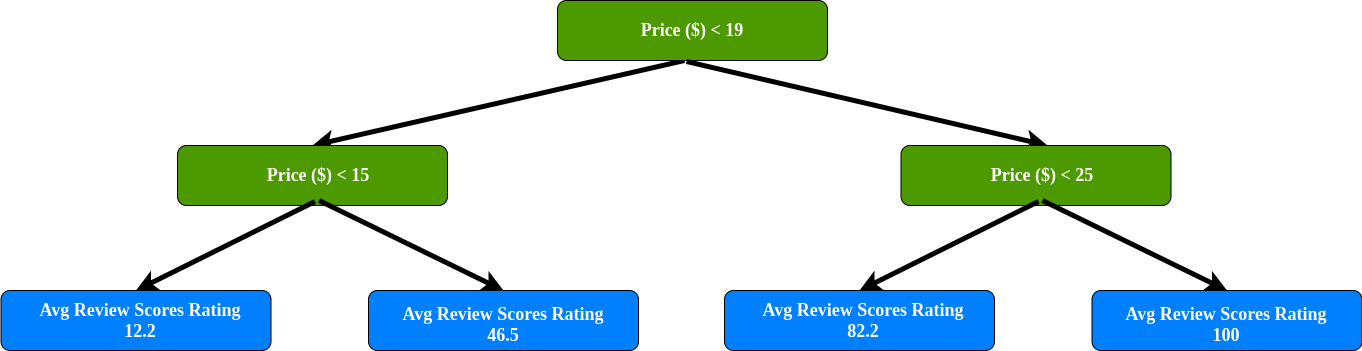


2.3 How does CART process the splitting of the dataset (predictor > 1)
This simulation uses a dummy data as following

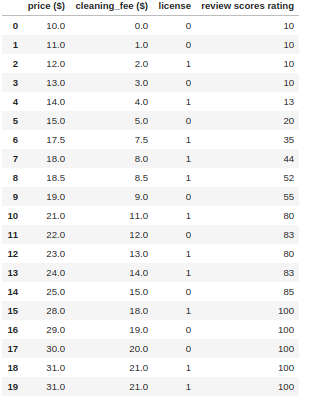

Find out the minimum RSS each predictor
Price with RSS = 3873.79

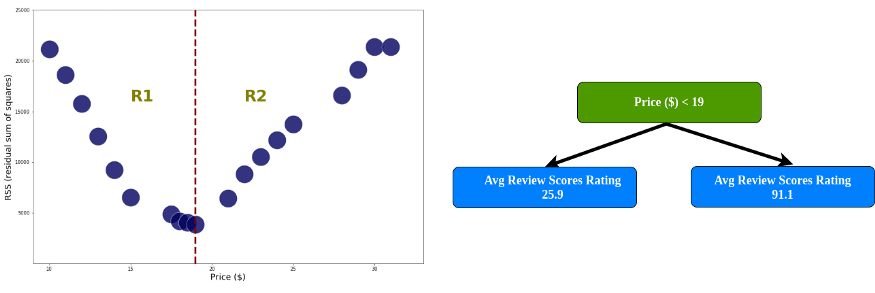

Cleaning fee with RSS = 64214.8

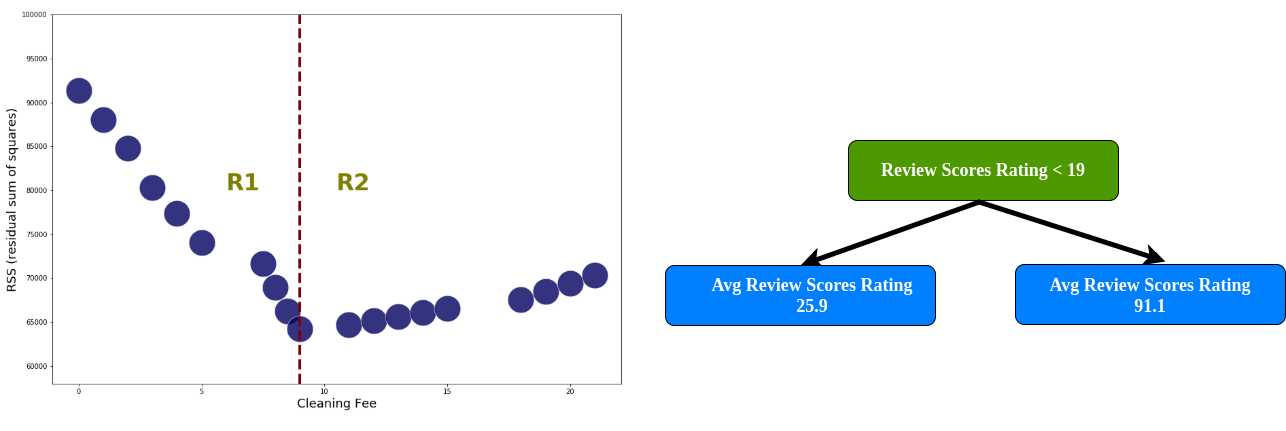

There is only one threshold in License, 1 or 0. So we use that threshold to calculate RSS. License with RSS = 11658.5

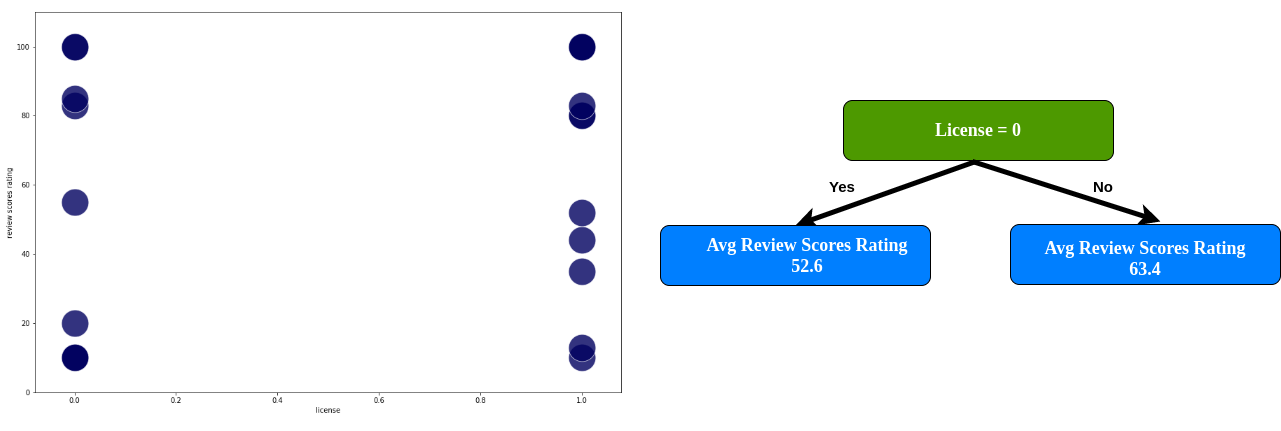

**We already have RSS every predictor, compare RSS for each predictor, and find the lowest RSS value. If we analyze, License has the lowest value so it becomes root.**

## How to avoid/counter Overfitting in Decision Trees?
 
The common problem with Decision trees, especially having a table full of columns, they fit a lot. Sometimes it looks like the tree memorized the training data set. If there is no limit set on a decision tree, it will give you 100% accuracy on the training data set because in the worse case it will end up making 1 leaf for each observation. Thus this affects the accuracy when predicting samples that are not part of the training set.

### Here are two ways to remove overfitting:

1. Pruning Decision Trees.
2. Random Forest

### 1. Pruning Decision Trees

The splitting process results in fully grown trees until the stopping criteria are reached. But, the fully grown tree is likely to overfit the data, leading to poor accuracy on unseen data.

Figure
Pruning in action
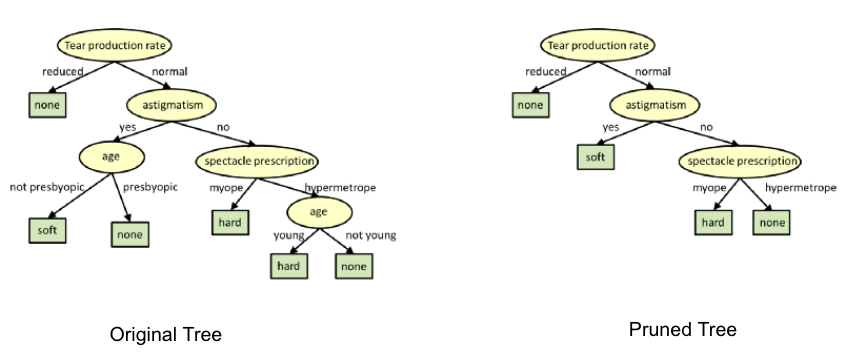
 
In the above diagram, the ‘Age’ attribute in the left-hand side of the tree has been pruned as it has more importance on the right-hand side of the tree, hence removing overfitting.


In pruning, you trim off the branches of the tree, i.e., remove the decision nodes starting from the leaf node such that the overall accuracy is not disturbed. This is done by segregating the actual training set into two sets: training data set, D and validation data set, V. Prepare the decision tree using the segregated training data set, D. Then continue trimming the tree accordingly to optimize the accuracy of the validation data set, V.



#### 2 Random Forest

- Random Forest is an example of ensemble learning, in which we combine multiple machine learning algorithms to obtain better predictive performance.

- Why the name “Random”?

Two key concepts that give it the name random:

- A random sampling of training data set when building trees.
- Random subsets of features considered when splitting nodes.

A technique known as bagging is used to create an ensemble of trees where multiple training sets are generated with replacement.

In the bagging technique, a data set is divided into N samples using randomized sampling. Then, using a single learning algorithm a model is built on all samples. Later, the resultant predictions are combined using voting or averaging in parallel.

# Decision Tree Regressor 

# 1. Importing libraries and data

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error 
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings("ignore")

# Creating data

df = pd.DataFrame({"X":['Asset Flip','Text Based','Visual Novel','2D Pixel Art','2D Vector Art','Strategy','First Person Shooter','Simulator', 'Racing', 'RPG', 'Sandbox','Open-World','MMOFPS','MMORPG'],
                   "Y":[100,500,1500,3500,5000,6000,8000,9500,12000,14000,15500,16500,25000,30000],
                   "Z":[1000,3000,5000,8000,6500,7000,15000,20000,21000,25000,27000,30000,52000,80000]})

df

,X,Y,Z
0,Asset Flip,100,1000
1,Text Based,500,3000
2,Visual Novel,1500,5000
3,2D Pixel Art,3500,8000
4,2D Vector Art,5000,6500
5,Strategy,6000,7000
6,First Person Shooter,8000,15000
7,Simulator,9500,20000
8,Racing,12000,21000
9,RPG,14000,25000


# 2. Splitting

In [67]:
x = df.iloc[:,1:-1].astype(int)
y = df.iloc[:,-1].astype(int)

x_train , x_test , y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# 3. Decision Tree Regressor Model

DecisionTreeRegressor(
    *,
    **criterion** = 'mse',
    **splitter** = 'best',
    **max_depth** = None,
    **min_samples_split** = 2,
    **min_samples_leaf** = 1,
    **min_weight_fraction_leaf** = 0.0,
    **max_features** = None,
    **random_state** = None,
    **max_leaf_nodes** = None,
    **min_impurity_decrease** = 0.0,
    **min_impurity_split** = None,
    **ccp_alpha** = 0.0,
)

Parameters
----------
**criterion** : {"mse", "friedman_mse", "mae", "poisson"}, default="mse"
- The function to measure the quality of a split. Supported criteria are 
   1. "mse" for the mean squared error, which is equal to variance reduction as feature selection criterion and minimizes the L2 loss using the mean of each terminal node,
   2. "friedman_mse", which uses mean squared error with Friedman's improvement score for potential splits, "mae" for the mean absolute error, which minimizes the L1 loss using the median of each terminal node, and "poisson" which uses reduction in Poisson deviance to find splits.


**splitter** : {"best", "random"}, default="best"
   - The strategy used to choose the split at each node. Supported strategies are "best" to choose the best split and "random" to choose the best random split.

**max_depth** : int, default=None
   -  The maximum depth of the tree. If None, then nodes are expanded until  all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_split** : int or float, default=2
   -  The minimum number of samples required to split an internal node:

    - If int, then consider `min_samples_split` as the minimum number.
    - If float, then `min_samples_split` is a fraction and
      `ceil(min_samples_split * n_samples)` are the minimum
      number of samples for each split.

**min_samples_leaf** : int or float, default=1
   - The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least ``min_samples_leaf`` training samples in each of the left and right branches.  This may have the effect of smoothing the model,
    especially in regression.

    - If int, then consider `min_samples_leaf` as the minimum number.
    - If float, then `min_samples_leaf` is a fraction and
      `ceil(min_samples_leaf * n_samples)` are the minimum
      number of samples for each node.


**min_weight_fraction_leaf** : float, default=0.0
   - The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have  equal weight when sample_weight is not provided.

**max_features** : int, float or {"auto", "sqrt", "log2"}, default=None
   - The number of features to consider when looking for the best split:

    - If int, then consider `max_features` features at each split.
    - If float, then `max_features` is a fraction and
      `int(max_features * n_features)` features are considered at each
      split.
    - If "auto", then `max_features=n_features`.
    - If "sqrt", then `max_features=sqrt(n_features)`.
    - If "log2", then `max_features=log2(n_features)`.
    - If None, then `max_features=n_features`.

    Note: the search for a split does not stop until at least one
    valid partition of the node samples is found, even if it requires to
    effectively inspect more than ``max_features`` features.

**random_state**: int, RandomState instance or None, default=None
   - Controls the randomness of the estimator. The features are always randomly permuted at each split, even if ``splitter`` is set to ``"best"``. When ``max_features < n_features``, the algorithm will select ``max_features`` at random at each split before finding the best  split among them. But the best found split may vary across different runs, even if ``max_features=n_features``. That is the case, if the improvement of the criterion is identical for several splits and one split has to be selected at random. To obtain a deterministic behaviour during fitting, ``random_state`` has to be fixed to an integer.


**max_leaf_nodes** : int, default=None
   - Grow a tree with ``max_leaf_nodes`` in best-first fashion. Best nodes are defined as relative reduction in impurity.  If None then unlimited number of leaf nodes.

**min_impurity_decrease** : float, default=0.0
  -  A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

    The weighted impurity decrease equation is the following::

        N_t / N * (impurity - N_t_R / N_t * right_impurity
                            - N_t_L / N_t * left_impurity)

    where ``N`` is the total number of samples, ``N_t`` is the number of
    samples at the current node, ``N_t_L`` is the number of samples in the
    left child, and ``N_t_R`` is the number of samples in the right child.

    ``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,
    if ``sample_weight`` is passed.

    .. versionadded:: 0.19

**min_impurity_split** : float, default=0
  -  Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.

    .. deprecated:: 0.19
       ``min_impurity_split`` has been deprecated in favor of
       ``min_impurity_decrease`` in 0.19. The default value of
       ``min_impurity_split`` has changed from 1e-7 to 0 in 0.23 and it
       will be removed in 1.0 (renaming of 0.25).
       Use ``min_impurity_decrease`` instead.

**ccp_alpha** : non-negative float, default=0.0
   - Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than
   -  ``ccp_alpha`` will be chosen. By default, no pruning is performed.
    

Attributes
----------
**feature_importances_** : ndarray of shape (n_features,)
    - The feature importances.
    - The higher, the more important the feature.
    The importance of a feature is computed as the
    (normalized) total reduction of the criterion brought
    by that feature. It is also known as the Gini importance [4]_.

    Warning: impurity-based feature importances can be misleading for
    high cardinality features (many unique values). See
    :func:`sklearn.inspection.permutation_importance` as an alternative.

**max_features_** : int
    The inferred value of max_features.

**n_features_** : int
    The number of features when ``fit`` is performed.

**n_outputs_** : int
    The number of outputs when ``fit`` is performed.

**tree_** : Tree instance
    The underlying Tree object.


Notes
-----
The default values for the parameters controlling the size of the trees
(e.g. ``max_depth``, ``min_samples_leaf``, etc.) lead to fully grown and
unpruned trees which can potentially be very large on some data sets. To
reduce memory consumption, the complexity and size of the trees should be
controlled by setting those parameter values.

In [75]:
dr = DecisionTreeRegressor()

dr.fit(x_train, y_train)

y_pred = dr.predict(x_test)

In [71]:
pred = dr.predict([[3750]])

pred

array([8000.])

# 4. Visualising the results

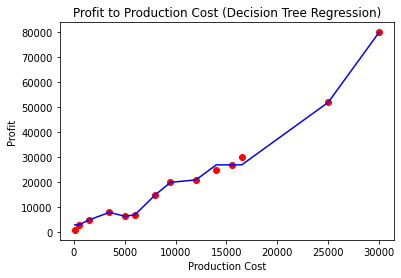

In [78]:
X_grid = x 
  
plt.scatter(x, y, color = 'red')
  
plt.plot(X_grid, dr.predict(X_grid), color = 'blue') 
  
plt.title('Profit to Production Cost (Decision Tree Regression)') 
  
plt.xlabel('Production Cost')
  
plt.ylabel('Profit')
  
plt.show()

[Text(749.8125, 996.6, 'X[0] <= 20250.0\nmse = 513971074.38\nsamples = 11\nvalue = 22227.273'),
 Text(523.125, 815.4000000000001, 'X[0] <= 7000.0\nmse = 64222222.222\nsamples = 9\nvalue = 12500.0'),
 Text(279.0, 634.2, 'X[0] <= 2500.0\nmse = 3040000.0\nsamples = 5\nvalue = 5900.0'),
 Text(139.5, 453.0, 'X[0] <= 1000.0\nmse = 1000000.0\nsamples = 2\nvalue = 4000.0'),
 Text(69.75, 271.79999999999995, 'mse = 0.0\nsamples = 1\nvalue = 3000.0'),
 Text(209.25, 271.79999999999995, 'mse = 0.0\nsamples = 1\nvalue = 5000.0'),
 Text(418.5, 453.0, 'X[0] <= 4250.0\nmse = 388888.889\nsamples = 3\nvalue = 7166.667'),
 Text(348.75, 271.79999999999995, 'mse = 0.0\nsamples = 1\nvalue = 8000.0'),
 Text(488.25, 271.79999999999995, 'X[0] <= 5500.0\nmse = 62500.0\nsamples = 2\nvalue = 6750.0'),
 Text(418.5, 90.59999999999991, 'mse = 0.0\nsamples = 1\nvalue = 6500.0'),
 Text(558.0, 90.59999999999991, 'mse = 0.0\nsamples = 1\nvalue = 7000.0'),
 Text(767.25, 634.2, 'X[0] <= 13750.0\nmse = 18187500.0\nsamples =

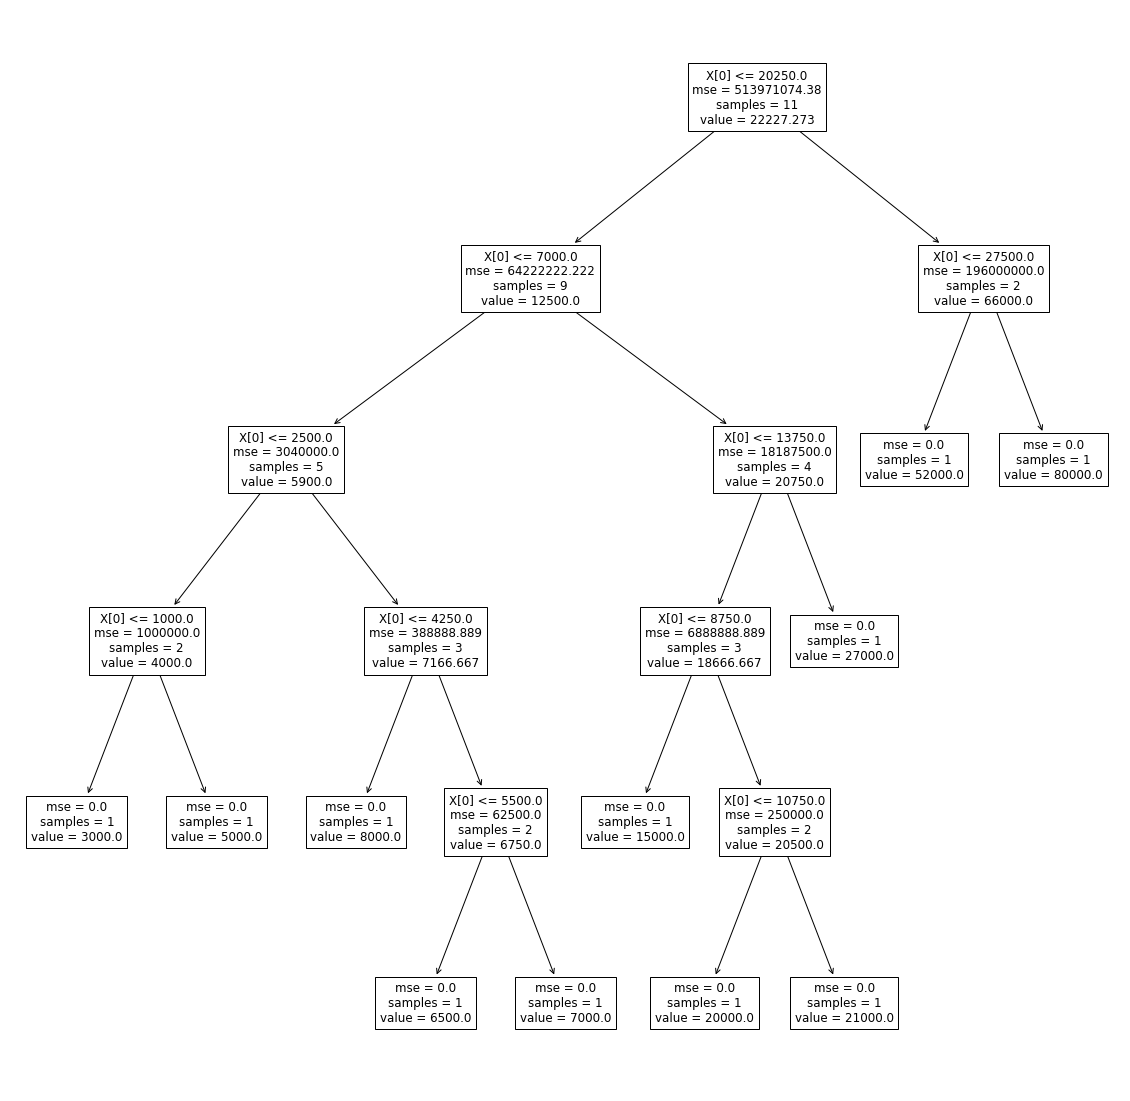

In [87]:
from sklearn.tree import plot_tree , export_graphviz
plt.figure(figsize=(20,20))
plot_tree(dr)


# 5. Evaluating

In [77]:
print(dr.tree_)